In [31]:
import json
import matplotlib.pyplot as plt

In [3]:
with open('../data/projects_with_contributors.json', 'r') as f:
    projects = json.load(f)
print(len(projects))

28384


In [4]:
pruned_projects = [project for project in projects if len(project['description'].split(' ')) > 10]

In [5]:
print(len(pruned_projects))

7200


In [6]:
project_dict = {}
for project in pruned_projects:
    project_dict[project['_id']] = project['description']

In [7]:
author_dict = dict()
for project in pruned_projects:
    for contrib in project['contributors']:
        if contrib in author_dict:
            author_dict[contrib].append(project['_id'])
        else :
            author_dict[contrib] = [project['_id']]

In [8]:
major_author = []
for author in author_dict:
    if len(author_dict[author]) > 10:
        major_author.append(author)  
print(len(major_author))

127


In [9]:
with open('runs/1500578799/prediction.json') as f:
    results = json.load(f)

In [11]:
result = {}
for out in results:
    result[out['id']] = out['category']

In [19]:
def get_count(score):
    total = 0
    for author in major_author:
        out = {i : 0 for i in range(10)}
        count = 0
        for project_id in author_dict[author]:
            category = result[project_id]
            if category == -1:
                continue
            out[category] += 1
            count += 1
        concentrate = 0
        for cat in sorted(out, key=out.get, reverse=True)[:2]:
            concentrate += out[cat]
        if concentrate/count > score:
            total += 1
    return total

In [21]:
count = []
for score in range(20):
    score = score/20
    count.append(get_count(score) / len(major_author))

In [38]:
def plot(count):
    fig, ax1 = plt.subplots()
    ax1.set_xlabel('percentage of projects in top 2 categories')
    ax1.set_ylabel('Percentage of authors in major_author')
    ax1.plot([c/20 for c in range(20)], count, '-o')
    plt.legend(loc='best')
    plt.show()

/Users/jerrysun/miniconda3/envs/osf/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


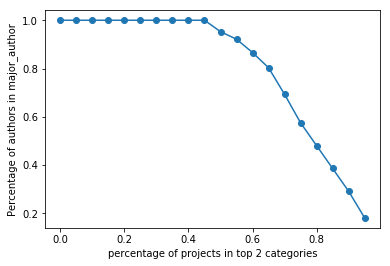

In [39]:
plot(count)